# Imports and reading in data

In [1]:
import keras
import nltk
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import yellowbrick
import tensorflow as tf
from yellowbrick.text import FreqDistVisualizer
from yellowbrick.text import TSNEVisualizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

Using TensorFlow backend.
/Users/michaelburak/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
plt.style.use('seaborn-talk')

## Reading in data

In [3]:
df = pd.read_csv('judge-1377884607_tweet_product_company.csv',encoding = "ISO-8859-1")

df.head(20)

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
5,@teachntech00 New iPad Apps For #SpeechTherapy...,NaN,No emotion toward brand or product
6,NaN,NaN,No emotion toward brand or product
7,"#SXSW is just starting, #CTIA is around the co...",Android,Positive emotion
8,Beautifully smart and simple idea RT @madebyma...,iPad or iPhone App,Positive emotion
9,Counting down the days to #sxsw plus strong Ca...,Apple,Positive emotion


In [4]:
df = df.dropna()

In [5]:
df.isnull().sum()

tweet_text                                            0
emotion_in_tweet_is_directed_at                       0
is_there_an_emotion_directed_at_a_brand_or_product    0
dtype: int64

# Preprocessing

## Renaming columns

In [6]:
df = df.rename(columns={"tweet_text": "text", "emotion_in_text_is_directed_at":"direction", "is_there_an_emotion_directed_at_a_brand_or_product":"sentiment"})

df

,text,emotion_in_tweet_is_directed_at,sentiment
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
...,...,...,...
9077,@mention your PR guy just convinced me to swit...,iPhone,Positive emotion
9079,&quot;papyrus...sort of like the ipad&quot; - ...,iPad,Positive emotion
9080,Diller says Google TV &quot;might be run over ...,Other Google product or service,Negative emotion
9085,I've always used Camera+ for my iPhone b/c it ...,iPad or iPhone App,Positive emotion


In [7]:
df.sentiment = df.sentiment.map({'Positive emotion': 1, 'Negative emotion': 0})

In [8]:
df.sentiment.value_counts()

1.0    2672
0.0     519
Name: sentiment, dtype: int64

In [9]:
df = df[df.sentiment != "I can't tell"]
df = df[df.sentiment != "No emotion toward brand or product"]

df.sentiment.value_counts()

/Users/michaelburak/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


1.0    2672
0.0     519
Name: sentiment, dtype: int64

In [10]:
def preprocess(text):
    text = text.str.replace("(<br/>)", "")
    text = text.str.replace('(<a).*(>).*(</a>)', '')
    text = text.str.replace('(&amp)', '')
    text = text.str.replace('(&gt)', '')
    text = text.str.replace('(&lt)', '')
    text = text.str.replace('(\xa0)', ' ')  
    return text

clean_df = df 
clean_df['text'] = preprocess(clean_df['text'])

clean_df['text']

0       .@wesley83 I have a 3G iPhone. After 3 hrs twe...
1       @jessedee Know about @fludapp ? Awesome iPad/i...
2       @swonderlin Can not wait for #iPad 2 also. The...
3       @sxsw I hope this year's festival isn't as cra...
4       @sxtxstate great stuff on Fri #SXSW: Marissa M...
                              ...                        
9077    @mention your PR guy just convinced me to swit...
9079    &quot;papyrus...sort of like the ipad&quot; - ...
9080    Diller says Google TV &quot;might be run over ...
9085    I've always used Camera+ for my iPhone b/c it ...
9088                        Ipad everywhere. #SXSW {link}
Name: text, Length: 3291, dtype: object

In [11]:
clean_df['tweet_len'] = clean_df['text'].astype(str).apply(len)
clean_df['tweet_words'] = clean_df['text'].apply(lambda x: len(str(x).split()))

In [12]:
clean_df.head()

,text,emotion_in_tweet_is_directed_at,sentiment,tweet_len,tweet_words
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,0.0,127,23
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,1.0,139,22
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,1.0,79,15
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,0.0,82,15
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,1.0,127,17


In [13]:
corpus = clean_df['text'].to_list()
corpus[:10]

['.@wesley83 I have a 3G iPhone. After 3 hrs tweeting at #RISE_Austin, it was dead!  I need to upgrade. Plugin stations at #SXSW.',
 "@jessedee Know about @fludapp ? Awesome iPad/iPhone app that you'll likely appreciate for its design. Also, they're giving free Ts at #SXSW",
 '@swonderlin Can not wait for #iPad 2 also. They should sale them down at #SXSW.',
 "@sxsw I hope this year's festival isn't as crashy as this year's iPhone app. #sxsw",
 "@sxtxstate great stuff on Fri #SXSW: Marissa Mayer (Google), Tim O'Reilly (tech books/conferences) ; Matt Mullenweg (Wordpress)",
 '#SXSW is just starting, #CTIA is around the corner and #googleio is only a hop skip and a jump from there, good time to be an #android fan',
 'Beautifully smart and simple idea RT @madebymany @thenextweb wrote about our #hollergram iPad app for #sxsw! http://bit.ly/ieaVOB',
 'Counting down the days to #sxsw plus strong Canadian dollar means stock up on Apple gear',
 'Excited to meet the @samsungmobileus at #sxsw so 

In [14]:
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
tk = TweetTokenizer() 
  
text_tokens = tk.tokenize(','.join(corpus))



In [15]:
text_tokens

['.',
 '@wesley83',
 'I',
 'have',
 'a',
 '3G',
 'iPhone',
 '.',
 'After',
 '3',
 'hrs',
 'tweeting',
 'at',
 '#RISE_Austin',
 ',',
 'it',
 'was',
 'dead',
 '!',
 'I',
 'need',
 'to',
 'upgrade',
 '.',
 'Plugin',
 'stations',
 'at',
 '#SXSW',
 '.',
 ',',
 '@jessedee',
 'Know',
 'about',
 '@fludapp',
 '?',
 'Awesome',
 'iPad',
 '/',
 'iPhone',
 'app',
 'that',
 "you'll",
 'likely',
 'appreciate',
 'for',
 'its',
 'design',
 '.',
 'Also',
 ',',
 "they're",
 'giving',
 'free',
 'Ts',
 'at',
 '#SXSW',
 ',',
 '@swonderlin',
 'Can',
 'not',
 'wait',
 'for',
 '#iPad',
 '2',
 'also',
 '.',
 'They',
 'should',
 'sale',
 'them',
 'down',
 'at',
 '#SXSW',
 '.',
 ',',
 '@sxsw',
 'I',
 'hope',
 'this',
 "year's",
 'festival',
 "isn't",
 'as',
 'crashy',
 'as',
 'this',
 "year's",
 'iPhone',
 'app',
 '.',
 '#sxsw',
 ',',
 '@sxtxstate',
 'great',
 'stuff',
 'on',
 'Fri',
 '#SXSW',
 ':',
 'Marissa',
 'Mayer',
 '(',
 'Google',
 ')',
 ',',
 'Tim',
 "O'Reilly",
 '(',
 'tech',
 'books',
 '/',
 'conference

In [16]:
stopwords_list = stopwords.words('english')

In [17]:
tokens_clean = [word.lower() for word in text_tokens if word.lower() not in stopwords_list]

print(tokens_clean)

['.', '@wesley83', '3g', 'iphone', '.', '3', 'hrs', 'tweeting', '#rise_austin', ',', 'dead', '!', 'need', 'upgrade', '.', 'plugin', 'stations', '#sxsw', '.', ',', '@jessedee', 'know', '@fludapp', '?', 'awesome', 'ipad', '/', 'iphone', 'app', 'likely', 'appreciate', 'design', '.', 'also', ',', "they're", 'giving', 'free', 'ts', '#sxsw', ',', '@swonderlin', 'wait', '#ipad', '2', 'also', '.', 'sale', '#sxsw', '.', ',', '@sxsw', 'hope', "year's", 'festival', 'crashy', "year's", 'iphone', 'app', '.', '#sxsw', ',', '@sxtxstate', 'great', 'stuff', 'fri', '#sxsw', ':', 'marissa', 'mayer', '(', 'google', ')', ',', 'tim', "o'reilly", '(', 'tech', 'books', '/', 'conferences', ')', ';', 'matt', 'mullenweg', '(', 'wordpress', ')', ',', '#sxsw', 'starting', ',', '#ctia', 'around', 'corner', '#googleio', 'hop', 'skip', 'jump', ',', 'good', 'time', '#android', 'fan', ',', 'beautifully', 'smart', 'simple', 'idea', 'rt', '@madebymany', '@thenextweb', 'wrote', '#hollergram', 'ipad', 'app', '#sxsw', '!', 

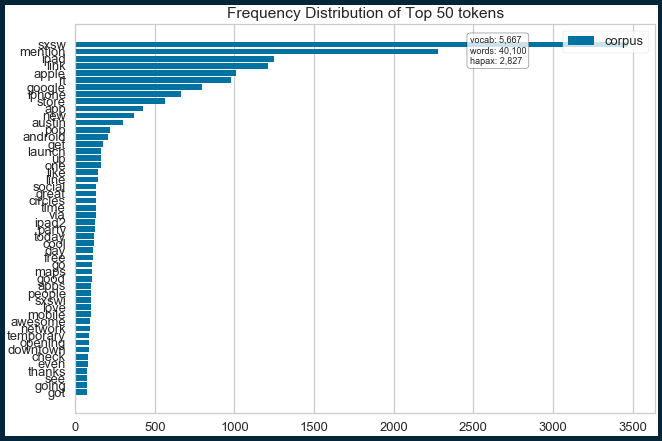

<Figure size 748.8x514.8 with 0 Axes>

In [18]:
fig = plt.figure(linewidth=10, edgecolor="#04253a")
vectorizer = CountVectorizer()
docs = vectorizer.fit_transform(tokens_clean)
features = vectorizer.get_feature_names()
visualizer = FreqDistVisualizer(features=features)
visualizer.fit(docs)
visualizer.poof()
plt.tight_layout()

## TO DO: T-sne

# Deep learning

In [19]:
from sklearn.model_selection import train_test_split
#dropped .values
clean_df = clean_df.dropna()
X = clean_df['text']
y = clean_df['sentiment']
# y
y = tf.keras.utils.to_categorical(
    y
)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [20]:
y

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [21]:
len(set(X))

3182

In [22]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train)

X_train = vectorizer.transform(X_train)
X_test  = vectorizer.transform(X_test)
X_train

<2137x4597 sparse matrix of type '<class 'numpy.int64'>'
	with 35451 stored elements in Compressed Sparse Row format>

## Densify

In [23]:
X_train = X_train.toarray()
X_test = X_test.toarray()

In [24]:
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [25]:
X_train = tf.keras.utils.normalize(X_train
)

X_test = tf.keras.utils.normalize(X_test)

In [26]:
len(X_train)

2137

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

In [28]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

In [29]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(2204, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='sigmoid'),
    tf.keras.layers.Dense(2)
])

In [30]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(.07),
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          141056    
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               66048     
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 130       
Total params: 215,490
Trainable params: 215,490
Non-trainable params: 0
_________________________________________________________________


In [31]:
len(X_train)

2137

In [32]:
history = model.fit(X_train, y_train,epochs=5,
                    validation_data=(X_test, y_test), 
                    validation_steps=30,
                   callbacks=[callback])

Epoch 1/5
67/67 [==============================] - 229s 3s/step - loss: 0.4827 - accuracy: 0.8250 - val_loss: 0.4372 - val_accuracy: 0.8416
Epoch 2/5
67/67 [==============================] - 239s 4s/step - loss: 0.4798 - accuracy: 0.8353 - val_loss: 0.4565 - val_accuracy: 0.8416
Epoch 3/5
67/67 [==============================] - 243s 4s/step - loss: 0.4590 - accuracy: 0.8353 - val_loss: 0.4492 - val_accuracy: 0.8416
Epoch 4/5
67/67 [==============================] - 235s 4s/step - loss: 0.4616 - accuracy: 0.8353 - val_loss: 0.4379 - val_accuracy: 0.8416
Epoch 5/5
67/67 [==============================] - 240s 4s/step - loss: 0.4657 - accuracy: 0.8353 - val_loss: 0.4400 - val_accuracy: 0.8416


In [33]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.8353
Testing Accuracy:  0.8416
